In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('$2$5Zoom_HH_Parsed.csv')

In [3]:
df.head()

,raw_hh,Stack_info,Preflop,Flop,Turn,River,Showdown,Summary,fold_y/n,villain_position,...,raised_y/n,villain_3b_pot_y/n,villain_4b_pot_y/n,hero_3b_pot_y/n,hero_4b_pot_y/n,river_bet_size_percentage,river_bet_predefined_y/n,river_bet_int_y/n,overbet_y/n,should_call
0,PokerStars Hand #3966386570: Hold'em No Limit...,PokerStars Hand #3966386570: Hold'em No Limit...,Dealt to Hero [6h Qh] UTG: folds Dealer: fold...,[5h 4h 8s] Hero: checks Big Blind: checks,[5h 4h 8s] [Qs] Hero: checks Big Blind: checks,[5h 4h 8s Qs] [Tc] Hero: bets $21.38 Big Blin...,UTG: shows [8c 6c] (a hand...) Dealer: shows ...,Total pot $118.12 | Rake $3.00 Board [5h 4h 8...,0,Big Blind,...,1,0,0,0,0,32.5,0,0,0,0
1,PokerStars Hand #3966385841: Hold'em No Limit...,PokerStars Hand #3966385841: Hold'em No Limit...,Dealt to Hero [Kh Js] UTG: folds UTG+1: folds...,[Kc 5h 3c] Hero: checks Dealer: bets $18.16 H...,[Kc 5h 3c] [Th] Hero: checks Dealer: bets $50...,[Kc 5h 3c Th] [9s] Hero: checks Dealer: bets ...,Small Blind: shows [8d Qd] (a hand...) Hero: ...,Total pot $410.46 | Rake $3.00 Board [Kc 5h 3...,0,Dealer,...,0,0,0,0,0,71.7,0,1,0,0
2,PokerStars Hand #3966384457: Hold'em No Limit...,PokerStars Hand #3966384457: Hold'em No Limit...,Dealt to Hero [6h 7c] UTG: folds UTG+1: folds...,[Tc Qc Ac] Small Blind: checks Hero: checks,[Tc Qc Ac] [9d] Small Blind: checks Hero: che...,[Tc Qc Ac 9d] [Ks] Small Blind: bets $5 Hero:...,Small Blind: shows [Kc 6c] (a hand...) Hero: ...,Total pot $30.00 | Rake $1.50 Board [Tc Qc Ac...,1,Small Blind,...,0,0,0,0,0,17.5,0,1,0,0
3,PokerStars Hand #3966382520: Hold'em No Limit...,PokerStars Hand #3966382520: Hold'em No Limit...,Dealt to Hero [Td Ad] UTG: folds Dealer: fold...,[7d 2h 9d] Hero: checks Big Blind: checks,[7d 2h 9d] [Th] Hero: bets $21.38 Big Blind: ...,[7d 2h 9d Th] [8h] Hero: checks Big Blind: be...,UTG: shows [2c Jc] (a hand...) Dealer: shows ...,Total pot $72.76 | Rake $3.00 Board [7d 2h 9d...,1,Big Blind,...,0,0,0,0,0,202.1,0,0,1,1
4,PokerStars Hand #3966380934: Hold'em No Limit...,PokerStars Hand #3966380934: Hold'em No Limit...,Dealt to Hero [Qc Js] UTG: raises $10 to $15 ...,[7d 9h Qs] Hero: checks UTG: bets $23.16 Hero...,[7d 9h Qs] [9s] Hero: checks UTG: bets $41.87...,[7d 9h Qs 9s] [5c] Hero: checks UTG: bets $79...,Small Blind: shows [2s Tc] (a hand...) UTG: s...,Total pot $162.56 | Rake $3.00 Board [7d 9h Q...,1,CO,...,0,0,0,0,0,50.0,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   raw_hh                     541 non-null    object 
 1   Stack_info                 541 non-null    object 
 2   Preflop                    541 non-null    object 
 3   Flop                       541 non-null    object 
 4   Turn                       541 non-null    object 
 5   River                      541 non-null    object 
 6   Showdown                   541 non-null    object 
 7   Summary                    541 non-null    object 
 8   fold_y/n                   541 non-null    int64  
 9   villain_position           541 non-null    object 
 10  hero_position              541 non-null    object 
 11  hero_OOP                   541 non-null    int64  
 12  all_in_y/n                 541 non-null    int64  
 13  raised_y/n                 541 non-null    int64  

In [5]:
df.describe()

,fold_y/n,hero_OOP,all_in_y/n,raised_y/n,villain_3b_pot_y/n,villain_4b_pot_y/n,hero_3b_pot_y/n,hero_4b_pot_y/n,river_bet_size_percentage,river_bet_predefined_y/n,river_bet_int_y/n,overbet_y/n,should_call
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.541590,0.428835,0.136784,0.081331,0.101664,0.011091,0.086876,0.012939,79.936784,0.369686,0.160813,0.184843,0.319778
std,0.498728,0.495368,0.343937,0.273596,0.302485,0.104823,0.281914,0.113116,48.363850,0.483166,0.367699,0.388529,0.466822
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,343.800000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().any()

raw_hh                       False
Stack_info                   False
Preflop                      False
Flop                         False
Turn                         False
River                        False
Showdown                     False
Summary                      False
fold_y/n                     False
villain_position             False
hero_position                False
hero_OOP                     False
all_in_y/n                   False
raised_y/n                   False
villain_3b_pot_y/n           False
villain_4b_pot_y/n           False
hero_3b_pot_y/n              False
hero_4b_pot_y/n              False
river_bet_size_percentage    False
river_bet_predefined_y/n     False
river_bet_int_y/n            False
overbet_y/n                  False
should_call                  False
dtype: bool

# EDA

- Histogram of river_bet_size_percentage
- Utilize hue for 'all_in_y/n', 'raised_y/n', 'villain_3b_pot_y/n', 'villain_4b_pot_y/n', 'river_bet_predefined_y/n', 'river_bet_int_y/n', 'hero_OOP'
- Show percentage of how much I missed out on -> percentage of fold y/n (what actually happened) and should_call (the 'correct' move)
*Note: Caveat for 'correct' because we do not want to be results oriented.  However, for the purposes of this notebook just going to use this as my 'target' variable.

In [7]:
df.describe().columns

Index(['fold_y/n', 'hero_OOP', 'all_in_y/n', 'raised_y/n',
       'villain_3b_pot_y/n', 'villain_4b_pot_y/n', 'hero_3b_pot_y/n',
       'hero_4b_pot_y/n', 'river_bet_size_percentage',
       'river_bet_predefined_y/n', 'river_bet_int_y/n', 'overbet_y/n',
       'should_call'],
      dtype='object')

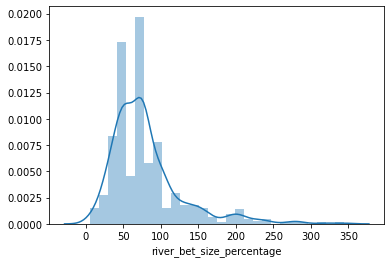

In [8]:
#Plot histogram of different bet/raise sizes employed by villain
sns.distplot(df['river_bet_size_percentage'])

Clearly bimodal.

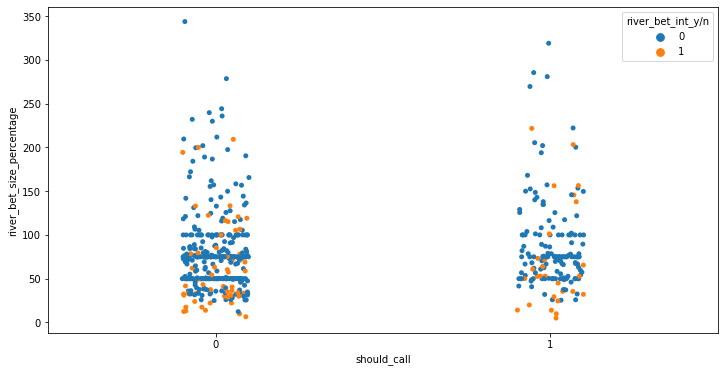

In [9]:
plt.figure(figsize=(12,6))
sns.stripplot(x = 'should_call', y = 'river_bet_size_percentage', hue = 'river_bet_int_y/n', data=df)

3D plotting?

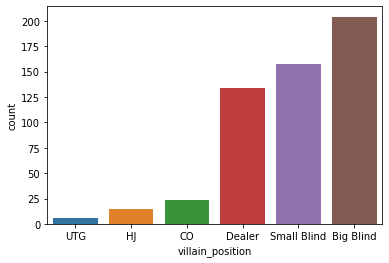

In [10]:
#Different villain positions. 
k = ['UTG', 'HJ', 'CO', 'Dealer', 'Small Blind', 'Big Blind']
sns.countplot(df['villain_position'], order = k)

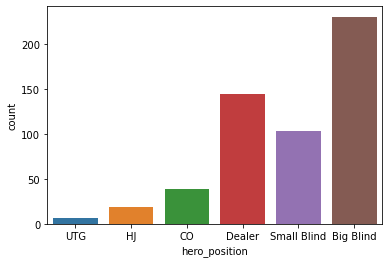

In [11]:
sns.countplot(df['hero_position'], order = k)

In [12]:
#Create new column for categorial conversion
def cat_conversion(x):
    if x <= 25:
        return 1
    elif x <= 50:
        return 2
    elif x <= 75:
        return 3
    elif x <= 100:
        return 4
    else:
        return 5

df['river_bet_size_percentage_cat'] = df['river_bet_size_percentage'].apply(lambda x: cat_conversion(x))

In [13]:
df_cat = df[['fold_y/n', 'hero_OOP', 'all_in_y/n', 'raised_y/n', 'villain_3b_pot_y/n', 'villain_4b_pot_y/n', 'hero_3b_pot_y/n', 'hero_4b_pot_y/n',
         'river_bet_predefined_y/n', 'river_bet_int_y/n', 'overbet_y/n', 'river_bet_size_percentage_cat', 'should_call']]

fold_y/n


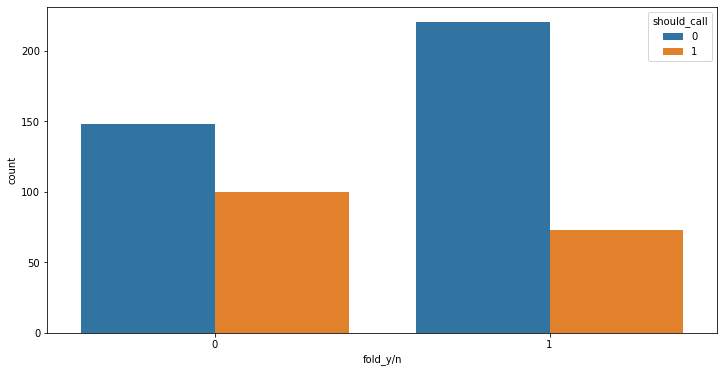

hero_OOP


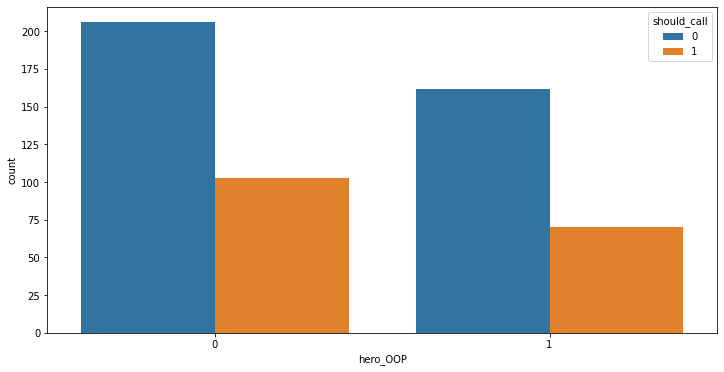

all_in_y/n


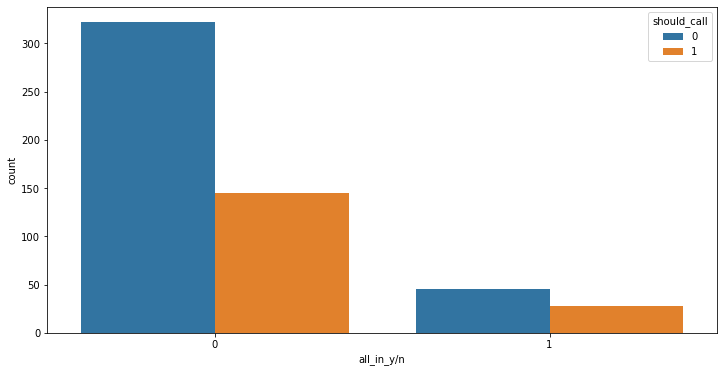

raised_y/n


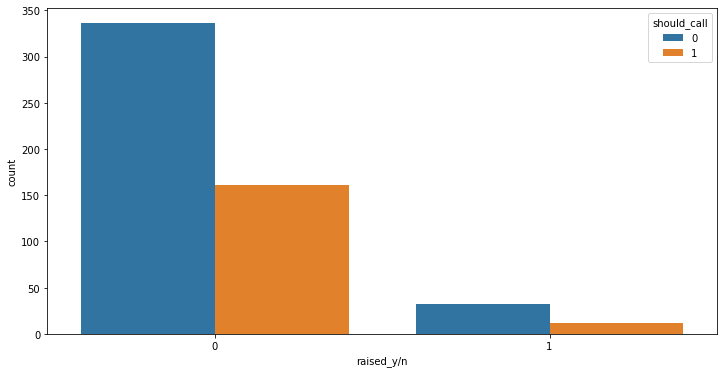

villain_3b_pot_y/n


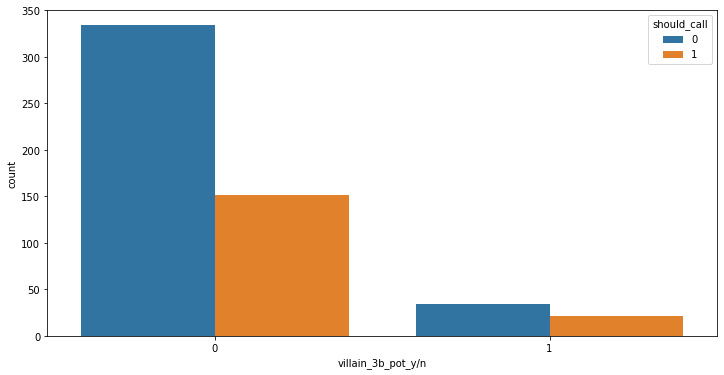

villain_4b_pot_y/n


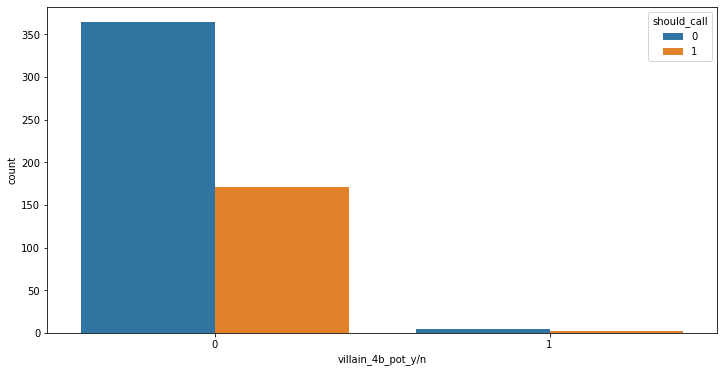

hero_3b_pot_y/n


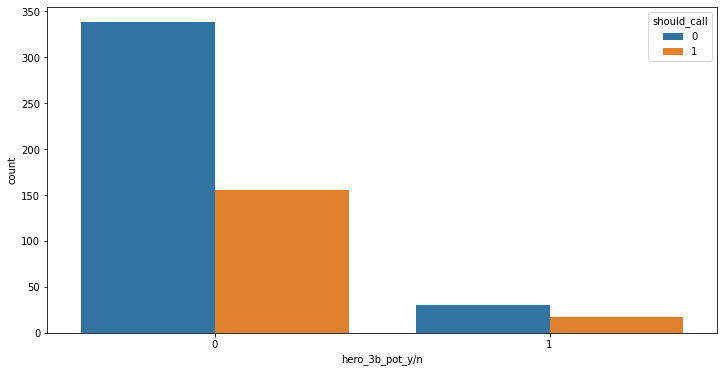

hero_4b_pot_y/n


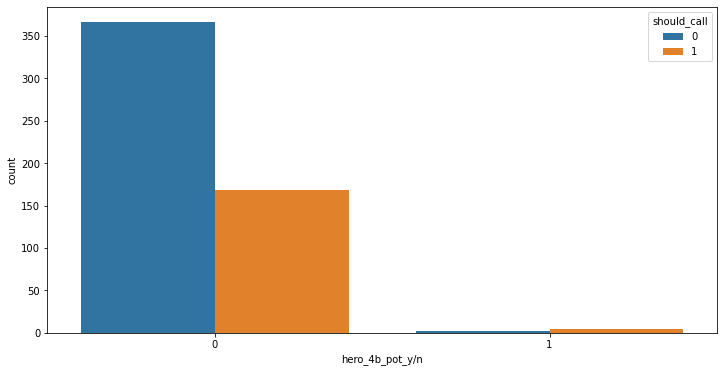

river_bet_predefined_y/n


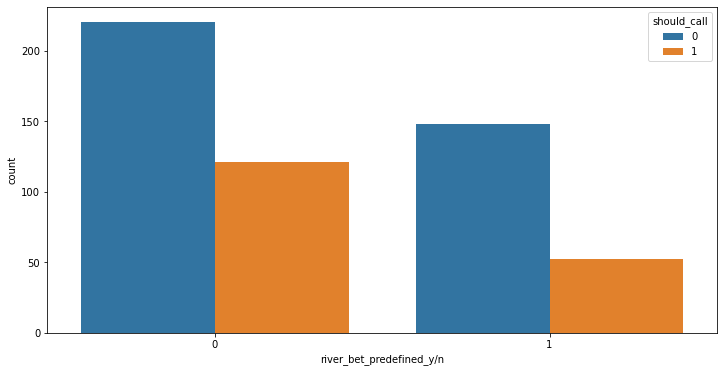

river_bet_int_y/n


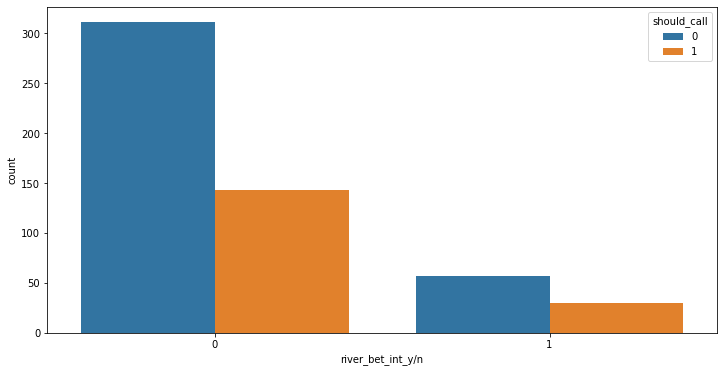

overbet_y/n


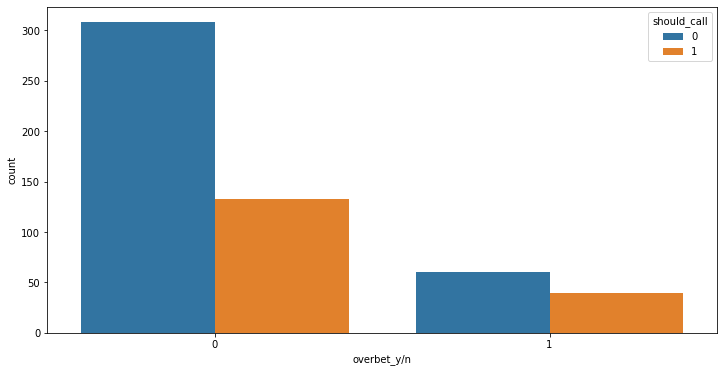

river_bet_size_percentage_cat


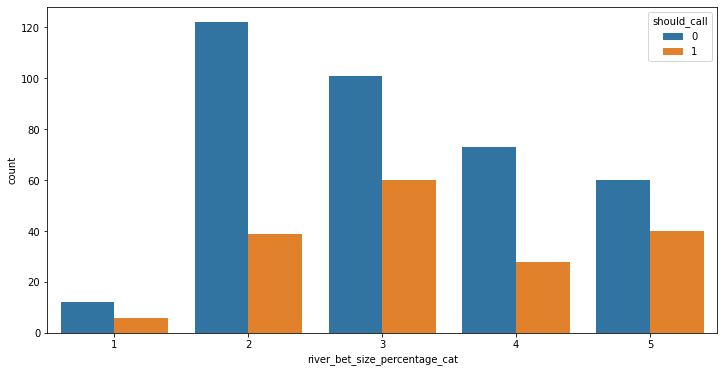

should_call


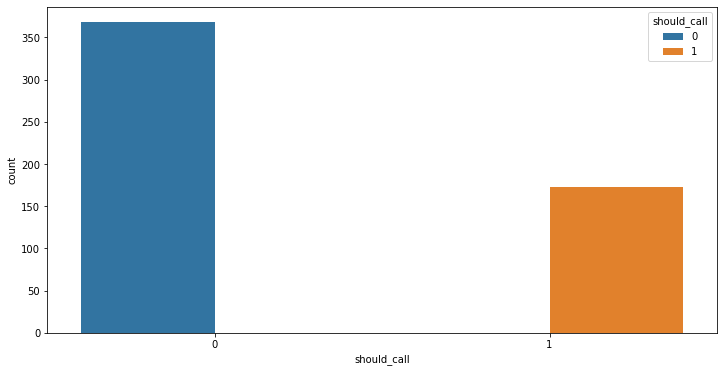

In [14]:
for column in df_cat.columns:
    plt.figure(figsize=(12,6))
    print(column)
    sns.countplot(x = column, hue='should_call', data=df_cat)
    plt.show()

percentages of the hue's?? How to best interpret


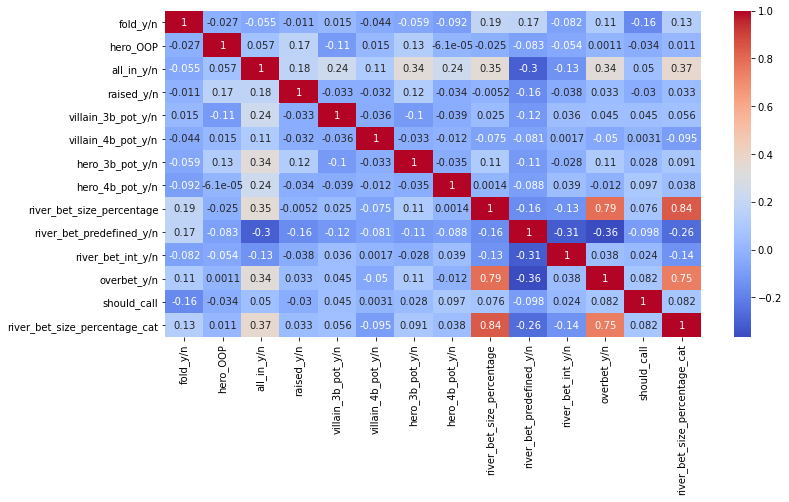

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [16]:
for column in df_cat.columns[:-1]:
    print(pd.pivot_table(df, index = 'should_call', columns = column, values = 'river_bet_size_percentage', aggfunc = 'count'))
    print('\n')
    print('**************')
    print('\n')

fold_y/n       0    1
should_call          
0            148  220
1            100   73


**************


hero_OOP       0    1
should_call          
0            206  162
1            103   70


**************


all_in_y/n     0   1
should_call         
0            322  46
1            145  28


**************


raised_y/n     0   1
should_call         
0            336  32
1            161  12


**************


villain_3b_pot_y/n    0   1
should_call                
0                   334  34
1                   152  21


**************


villain_4b_pot_y/n    0  1
should_call               
0                   364  4
1                   171  2


**************


hero_3b_pot_y/n    0   1
should_call             
0                338  30
1                156  17


**************


hero_4b_pot_y/n    0  1
should_call            
0                366  2
1                168  5


**************


river_bet_predefined_y/n    0    1
should_call                       
0                 

river_bet_size_percentage_cat and overbet y/n highly correlated.  Only use one. 

#Note: Calling overbets is more profitable (win more)
Another model that utilizes regression? (Calculate EV)

# Modeling

My initial thinking is just utilize some sort of logistical regression.

How to min-max scale?

In [39]:
df.dtypes

raw_hh                            object
Stack_info                        object
Preflop                           object
Flop                              object
Turn                              object
River                             object
Showdown                          object
Summary                           object
fold_y/n                           int64
villain_position                  object
hero_position                     object
hero_OOP                           int64
all_in_y/n                         int64
raised_y/n                         int64
villain_3b_pot_y/n                 int64
villain_4b_pot_y/n                 int64
hero_3b_pot_y/n                    int64
hero_4b_pot_y/n                    int64
river_bet_size_percentage        float64
river_bet_predefined_y/n           int64
river_bet_int_y/n                  int64
overbet_y/n                        int64
should_call                        int64
river_bet_size_percentage_cat      int64
dtype: object

In [17]:
df_model = df[['hero_OOP', 'all_in_y/n', 'raised_y/n', 'villain_3b_pot_y/n', 'villain_4b_pot_y/n', 'hero_3b_pot_y/n', 'hero_4b_pot_y/n', 
              'river_bet_predefined_y/n', 'river_bet_int_y/n', 'river_bet_size_percentage_cat', 'should_call']]

In [ ]:
#Try one hot encoding river_bet_size_percentage_cat!!!

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_model.drop('should_call', axis=1), df_model['should_call'], test_size=0.3, random_state=42)

In [20]:
#The following inspired by Ken Jee's Titanic notebook
#https://www.kaggle.com/kenjee/titanic-project-example
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [45]:
gnb = GaussianNB()
cv = cross_val_score(gnb, x_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.67105263 0.68421053 0.68421053 0.69333333 0.68      ]
0.6825614035087719


In [21]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, x_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.67105263 0.68421053 0.68421053 0.69333333 0.68      ]
0.6825614035087719


In [24]:
lr.coef_

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [47]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.68421053 0.71052632 0.67105263 0.70666667 0.69333333]
0.6931578947368421


In [48]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.67105263 0.69736842 0.61842105 0.65333333 0.69333333]
0.6667017543859648


In [49]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.65789474 0.68421053 0.64473684 0.72       0.66666667]
0.6747017543859649


In [50]:
svc = SVC(probability = True)
cv = cross_val_score(svc,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.68421053 0.69736842 0.67105263 0.65333333 0.64      ]
0.6691929824561403


In [51]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/daniellim/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/daniellim/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [43]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [69]:
pd.DataFrame(zip(x_train.columns, lr.coef_.tolist()[0]), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,hero_OOP,-0.074778
1,all_in_y/n,-0.140016
2,raised_y/n,-0.296676
3,villain_3b_pot_y/n,-0.060669
4,villain_4b_pot_y/n,0.044742
5,hero_3b_pot_y/n,0.108779
6,hero_4b_pot_y/n,1.159501
7,river_bet_predefined_y/n,-0.396058
8,river_bet_int_y/n,0.128886
9,river_bet_size_percentage_cat,0.136159


In [ ]:
#TRY THE LAB 4 PLOTTING AND STATSMODELS!!!!

In [108]:
predictions = lr.predict(x_test)

In [109]:
score = lr.score(x_test, y_test)

In [110]:
score

0.6932515337423313

In [111]:
from sklearn import metrics

In [112]:
cm = metrics.confusion_matrix(y_test, predictions)

In [113]:
cm

array([[111,   2],
       [ 48,   2]])

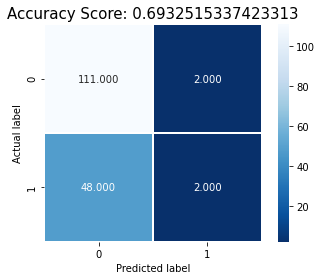

In [114]:
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('river_call_ConfusionSeabornCodementor.png')
plt.show()

Next step:
- Fine tuning model (adjust parameters)
- Gather more data?
- Add more parameters? (bet flop y/n, bet turn y/n, triple barrel, etc.)
- Add another metric (Calling a small bet vs large bet what is the trade off and EV difference -> Put different weight. 
- Random forest, bootstrap, XGboost